# YAPILACAK OLAN SENTƒ∞MENT ANALƒ∞Zƒ∞N DEMOSU OLARAK PROJE YAPILDI

## Havayolu i√ßin Tweet

## Tweetler Havayolu performanslarƒ± i√ßin duygu analizi verileri.

In [1]:
import pandas as pd
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data=pd.read_csv("Tweets.csv")

In [3]:
data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [76]:
data["text"].isnull().sum()

0

## Yalnƒ±zca metin ve duygu s√ºtununa ihtiyacƒ±mƒ±z var. O y√ºzden sadece o s√ºtunlarƒ± se√ßiyoruz

In [77]:
review_data= data[["text","airline_sentiment"]]

In [78]:
review_data.shape

(14640, 2)

In [79]:
review_data.head()

text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative

## Duyarlƒ±lƒ±k analizi veri k√ºmesinde 14.000'den fazla veri √∂rneƒüi vardƒ±r.

In [80]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [81]:
len(data["airline_sentiment"])

14640

In [82]:
len(data["text"])

14640

In [83]:
review_data.columns

Index(['text', 'airline_sentiment'], dtype='object')

## D√ºzenli ifade (Regular expression)
## Bilgisayarcƒ±lƒ±kta d√ºzenli ifadeler veya kurallƒ± ifadeler, ele alƒ±nan metindeki kimi katarlarƒ±n kƒ±sa yoldan ve esnek bir bi√ßimde belirlenmesini saƒülar. Bu katarlar belli karakterler, kelimeler veya karakter √∂r√ºnt√ºleri olabilir

In [84]:
from textblob import TextBlob  

import re

def clean_tweet(tweet):
    '''
Baƒülantƒ±larƒ± ve √∂zel karakterleri regex kullanarak kaldƒ±rarak bir tweet'teki metni temizlemek i√ßin yardƒ±mcƒ± program i≈ülevi.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z  \t])|(\w+:\/\/\S+)", " ", tweet).split())


for tweet in data:
        analysis = TextBlob(clean_tweet(tweet))
        pol = analysis.sentiment.polarity
        sub = analysis.subjectivity
        pol_round = '%.3f' % pol
        sub_round = '%.3f' % sub

### Bu ikili sƒ±nƒ±flandƒ±rma problemi i√ßin veri setimizde ger√ßekten tarafsƒ±z incelemelere ihtiyacƒ±mƒ±z yok. Bu nedenle, bu satƒ±rlarƒ± veri k√ºmesinden bƒ±rakƒ±n.

In [85]:
review_data=review_data[review_data["airline_sentiment"] != "neutral"]

In [86]:
review_data.shape

(11541, 2)

In [87]:
review_data.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [88]:
review_data.head()

text airline_sentiment
1  @VirginAmerica plus you've added commercials t...          positive
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative
5  @VirginAmerica seriously would pay $30 a fligh...          negative
6  @VirginAmerica yes, nearly every time I fly VX...          positive

In [89]:
data["airline_sentiment"].isnull().sum()

0

In [90]:
review_data["airline_sentiment"].describe()

count        11541
unique           2
top       negative
freq          9178
Name: airline_sentiment, dtype: object

In [91]:
review_data["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

### Bu veri k√ºmesinin etiketleri kategoriktir. Makineler yalnƒ±zca sayƒ±sal verileri anlar. Bu nedenle, factorize() y√∂ntemini kullanarak kategorik deƒüerleri sayƒ±sala d√∂n√º≈üt√ºr√ºn. Bu, bir sayƒ±sal deƒüerler dizisi ve bir kategori Dizini d√∂nd√ºr√ºr.

In [92]:
sentiment_label=review_data.airline_sentiment.factorize()

In [93]:
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [94]:
len(sentiment_label) #0 - #1

2

##  0 olumlu duyguyu, 1 ise olumsuz duyguyu temsil eder.

### Metin verilerimizi makine √∂ƒürenimi modelimizin anlayacaƒüƒ± ≈üekle d√∂n√º≈üt√ºrelim

In [95]:
tweet=review_data.text.values

In [96]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [97]:
from tensorflow.keras.preprocessing.text import Tokenizer

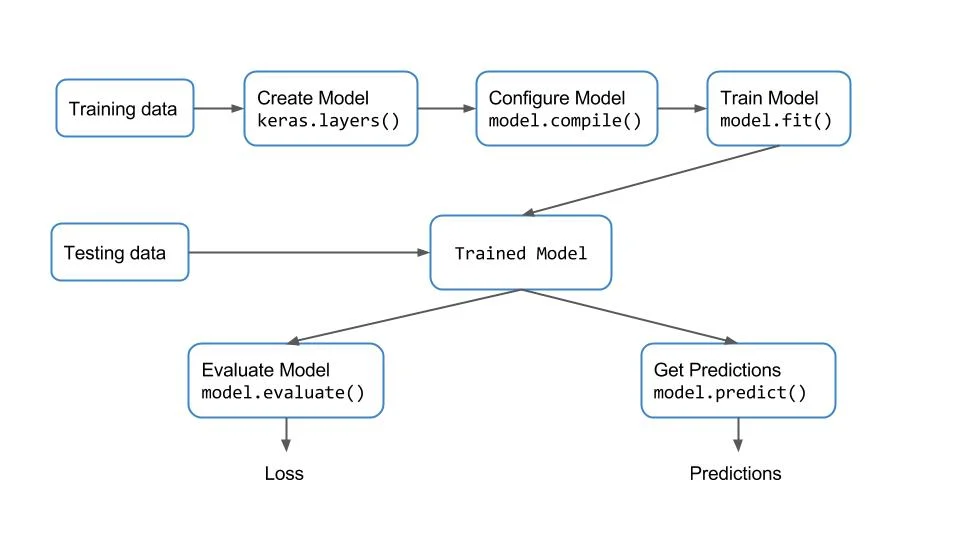

In [98]:
tokenizer=Tokenizer(num_words=5000)

In [99]:
tokenizer

In [100]:
tokenizer.fit_on_texts(tweet)

### fit_on_texts() y√∂ntemi, kelimeler ve atanan sayƒ±lar arasƒ±nda bir ili≈üki olu≈üturur. Bu ili≈ükilendirme, tokenizer.word_index √∂zniteliƒüinde bir s√∂zl√ºk bi√ßiminde saklanƒ±r.
### ≈ûimdi, text_to_sequence() y√∂ntemini kullanarak kelimeleri atanan sayƒ±larla deƒüi≈ütirelim.

In [101]:
encoded_docs=tokenizer.texts_to_sequences(tweet)

In [102]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
padded_sequence=pad_sequences(encoded_docs,maxlen=200)

# Build The Classifier 

## Bƒ±rakma, d√ºzenlile≈ütirme tekniklerinden biridir. Fazla takƒ±lmayƒ± √∂nlemek i√ßin kullanƒ±lƒ±r.

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Embedding

In [45]:
vocab_size=len(tokenizer.word_index)+1
embedding_vector_lenght=32

In [46]:
model=Sequential()

In [47]:
model.add(Embedding(vocab_size,embedding_vector_lenght,input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5)),
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [48]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

### Model √∂zet tablosu, model ile baƒüƒ±mlƒ± deƒüi≈üken arasƒ±ndaki ili≈ükinin g√ºc√ºn√º bildirir. √áoklu korelasyon katsayƒ±sƒ± olan R, baƒüƒ±mlƒ± deƒüi≈ükenin g√∂zlemlenen ve model tarafƒ±ndan tahmin edilen deƒüerleri arasƒ±ndaki doƒürusal korelasyondur. B√ºy√ºk deƒüeri g√º√ßl√º bir ili≈ükiyi g√∂sterir.

 # Duygu analizi modelini eƒüitin

In [50]:
history=model.fit(padded_sequence,sentiment_label[0],validation_split=0.2,epochs=5,batch_size=32)

Epoch 1/5
289/289 [==============================] - 34s 112ms/step - loss: 0.4032 - accuracy: 0.8332 - val_loss: 0.2025 - val_accuracy: 0.9220
Epoch 2/5
289/289 [==============================] - 32s 110ms/step - loss: 0.2192 - accuracy: 0.9135 - val_loss: 0.1630 - val_accuracy: 0.9402
Epoch 3/5
289/289 [==============================] - 32s 109ms/step - loss: 0.1631 - accuracy: 0.9392 - val_loss: 0.1601 - val_accuracy: 0.9450
Epoch 4/5
289/289 [==============================] - 32s 110ms/step - loss: 0.1311 - accuracy: 0.9493 - val_loss: 0.1689 - val_accuracy: 0.9450
Epoch 5/5
289/289 [==============================] - 32s 110ms/step - loss: 0.1073 - accuracy: 0.9601 - val_loss: 0.1922 - val_accuracy: 0.9433


## Deƒüer Doƒüruluƒüu => 0.9433

## Accuracy nin y√ºksek √ßƒ±kmasƒ± her zaman iyi deƒüildir makine eldeki verilerle ezbere yatar bu y√ºzden eklemeleri ona g√∂re ayarlamak lazƒ±m

# Data Viz

<AxesSubplot:>

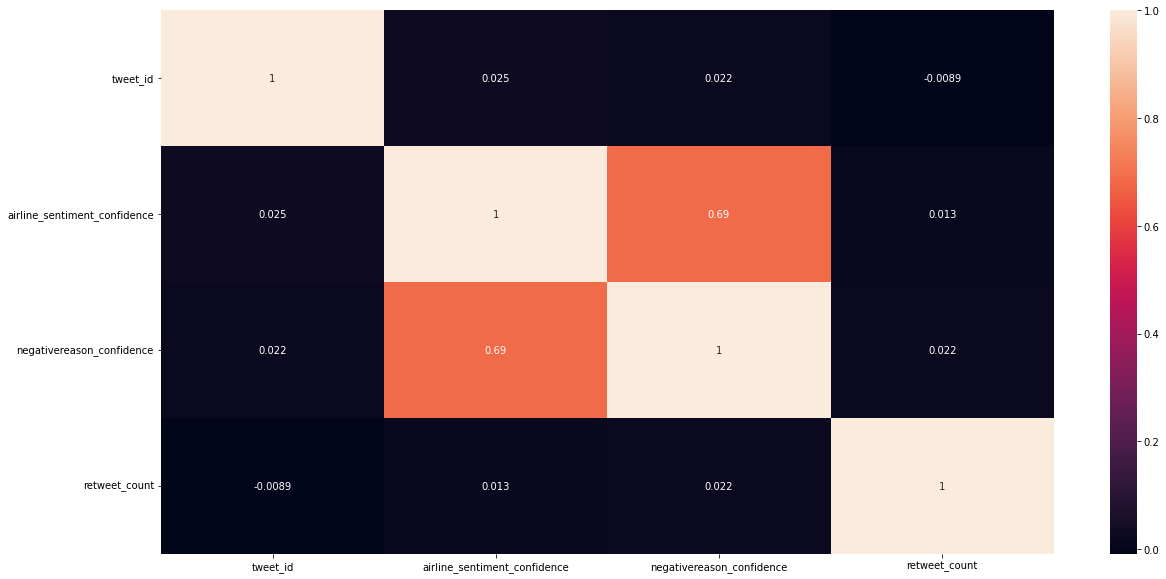

In [51]:
plt.figure(figsize=(20,10))
corr=data.corr()
sns.heatmap(corr,annot=True)

### Genel olarak baktƒ±ƒüƒ±mƒ±zda Heatmap ile elde edilen verilerin basit olduƒüu d√º≈ü√ºn√ºlebilir. Oysaki bu veriler sayesinde internet kullanƒ±cƒ±larƒ±nƒ±n en √ßok tercih ettiƒüi alanlar belirlenir. B√∂ylece web sayfasƒ±nƒ±n kalitesi olup olmadƒ±ƒüƒ±, ne kadar dikkat √ßekici olduƒüu ve iyile≈ütirilmesi gerek alanlarƒ±n nereler olduƒüu anla≈üƒ±lƒ±r.

### B√∂ylece gerekli √ßalƒ±≈ümalarƒ±n yapƒ±lmasƒ± ile sayfaya gelen ziyaret√ßilerin m√º≈üteriye d√∂n√º≈ü√ºm√º saƒülanarak firmanƒ±n √ßok daha verimli faaliyetler i√ßerisinde olmasƒ± ama√ßlanƒ±r. √ñrneƒüin ziyaret√ßilerin en √ßok yoƒüunla≈ütƒ±ƒüƒ± alanlara reklamlar yerle≈ütirilerek, bu kampanyalara daha √ßok tƒ±klanƒ±lmasƒ± ve daha geni≈ü bir kitleye ula≈üƒ±lmasƒ± saƒülanƒ±r.

# Word Cloud olu≈üturma

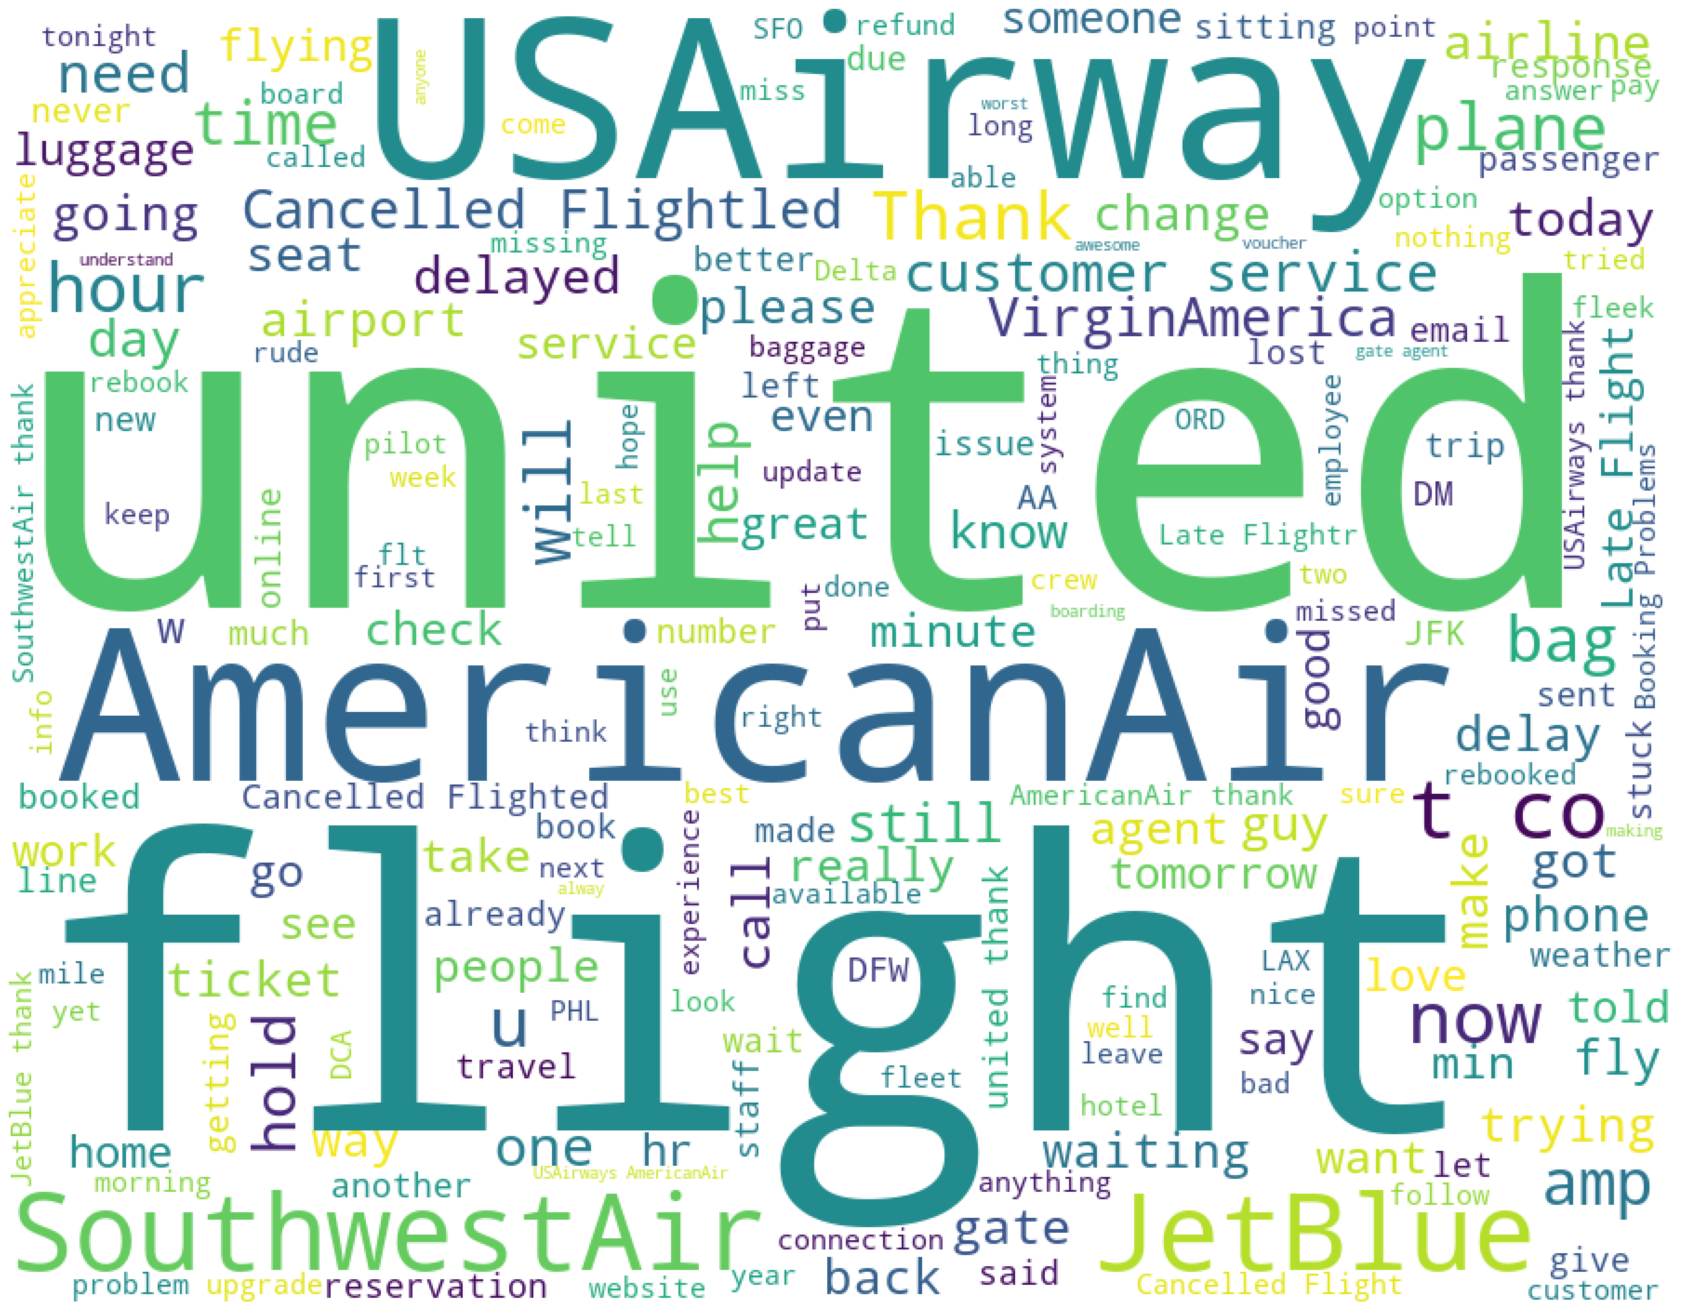

In [52]:
wordcloud=WordCloud(background_color="white",width=900,height=700)
text_cloud=wordcloud.generate(" ".join(data["text"]))
plt.figure(figsize=(30,30))
plt.imshow(text_cloud)
plt.axis("off")
plt.show()

## Accuracy score graph with val_accuracy plot

## Accuracy, anla≈üƒ±lmasƒ± ve yorumlanmasƒ± en basit √∂l√ß√ºtlerden birisidir. Makine √∂ƒürenmesi sƒ±nƒ±flandƒ±rma algoritmalarƒ±nƒ±n testlerinde sƒ±klƒ±kla kullanƒ±lƒ±r. Accuracy skoru a≈üaƒüƒ±daki gibi hesaplanƒ±r. Accuracy skoru 0 ve 1 arasƒ±nda olup 1'e yakla≈üan skorlarda model ba≈üarƒ±lƒ± kabul edilir.

### Validation b√∂l√ºm√º train veri seti i√ßinden se√ßilir. Train veri seti √ºzerinde doƒüru model se√ßimi yapƒ±larak algoritma belirlenir. Validation b√∂l√ºm√ºnde ise uygulanan model iyile≈ütirilmeye √ßalƒ±≈üƒ±lƒ±r. Bunun i√ßin hiper parametrik (hyperparameter tuning) uygulamalar denenerek en optimum katsayƒ±lar/aƒüƒ±rlƒ±klar bulunmaya √ßalƒ±≈üƒ±lƒ±r. √ñzellikle √ßok b√ºy√ºk veri setleri √ºzerinde s√ºrekli Train datasƒ± √ºzerinden √ßalƒ±≈üƒ±lamayacaƒüƒ± i√ßin k√º√ß√ºk bir b√∂l√ºm alƒ±narak validation olarak tanƒ±mlanƒ±r.

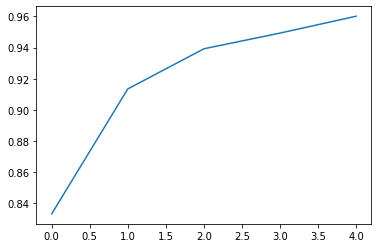

In [53]:
plt.plot(history.history["accuracy"],label="acc")

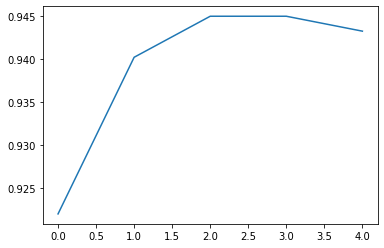

In [66]:
plt.plot(history.history["val_accuracy"],label="vall_acc")

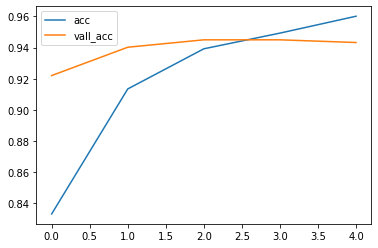

<Figure size 432x288 with 0 Axes>

In [67]:
plt.plot(history.history["accuracy"],label="acc")
plt.plot(history.history["val_accuracy"],label="vall_acc")
plt.legend()
plt.show()
plt.savefig("Accuracy plot.png")

## Loss and Vall_loss

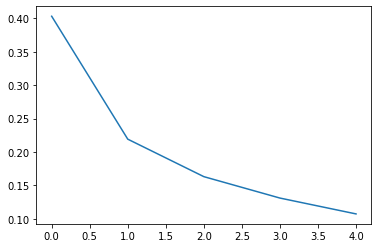

In [68]:
plt.plot(history.history["loss"],label="loss")

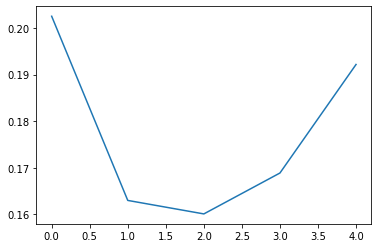

In [69]:
plt.plot(history.history["val_loss"],label="vall_loss")

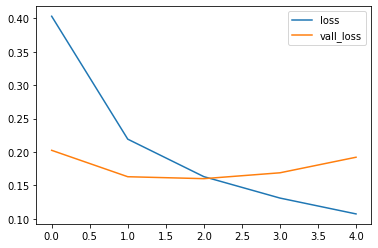

In [70]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="vall_loss")
plt.legend()
plt.show()

## Duygu Analiz Modeli Olu≈üturma 

### Bir metni girdi olarak alan ve tahmin etiketini √ßƒ±karan bir i≈ülev modelini olu≈üturuyoruz (kƒ±sacasƒ± bir fonksiyon altƒ±nda hƒ±zlƒ± √ßalƒ±≈ümasƒ±nƒ± saƒülƒ±yoruz)

In [71]:
def predict_sentiment(text):
    tw=tokenizer.texts_to_sequences([text])
    tw=pad_sequences(tw,maxlen=200)
    prediction=int(model.predict(tw).round().item())
    print("Predict Label:",sentiment_label[1][prediction])

In [72]:
test_sentences=" I enjoyed my journey on this flight "
predict_sentiment(test_sentences)

1/1 [==============================] - 0s 183ms/step
Predict Label: positive


### "Bu u√ßu≈üta yolculuƒüumdan keyif aldƒ±m"

In [73]:
test_sentences2="You buy a ticket from THY. At least they give toast at THY. They also cut it up in Anatolia. They just distribute a little water. We knew Anatolia of THY, but they act as a subsidiary of SunExpress. thy is far from its old quality."
predict_sentiment(test_sentences2)

1/1 [==============================] - 0s 22ms/step
Predict Label: negative


### "THY dan bilet alƒ±yorsun.Sunexpress' in hurdaya √ßƒ±kmƒ±≈ü eskimi≈ü koltuklarda ba≈ü koyacak yerleri ellenemeyecek kadar kirlenmi≈ü u√ßaklarƒ± ile yolculuk yaptirmaktalar. THY da en azƒ±ndan tost vermekteler.Anadolu da onu da kesmi≈üler.sadece k√º√ß√ºk bir su dagitmaktalar. Anadoluyu THY nin biliyorduk fakat SunExpress in yan firmasƒ± gibi davranmaktalar.thy eski kalitesinden √ßok uzak".

In [74]:
test_sentences3="Qatar Airways have promised me a refund but have failed to make the refund. They refuse to answer emails and hang up when I phone them"
predict_sentiment(test_sentences3)

1/1 [==============================] - 0s 21ms/step
Predict Label: negative


## "Qatar Airways bana bir geri √∂deme s√∂z√º verdi, ancak geri √∂demeyi yapmadƒ±. E-postalara cevap vermeyi reddediyorlar ve onlarƒ± aradƒ±ƒüƒ±mda telefonu kapatƒ±yorlar"

In [104]:
test_sentences4="At the Istanbul Airport THY counter, Aylin Karadaƒülƒ± provided the service we wanted for a long time with her calm and polite demeanor, and we would also like to thank youüôèüèª"
predict_sentiment(test_sentences4)

1/1 [==============================] - 0s 21ms/step
Predict Label: positive


## "ƒ∞stanbul Havalimani THY kontuarƒ±nda Aylin Karadaƒülƒ±, g√∂revine hakim, sakin ve kibar tavrƒ±yla uzun zamandƒ±r almak istediƒüimiz hizmeti saƒüladƒ±, ayrƒ±ca te≈üekk√ºrlerimizi sunarƒ±züôèüèª"